<a href="https://colab.research.google.com/github/nosequeponer12345/Casos-crimenes-Cali/blob/main/ENTREGABLE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nosequeponer12345/Casos-crimenes-Cali.git

fatal: destination path 'Casos-crimenes-Cali' already exists and is not an empty directory.


In [ ]:
!ls Casos-crimenes-Cali


casos_crimenes_2023.xlsx  ENTREGABLE_2.ipynb  README.md


In [ ]:
import pandas as pd
!ls Casos-crimenes-Cali
try:
    df = pd.read_excel('/content/Casos-crimenes-Cali/casos_crimenes_2023.xlsx')
    msg = "Datos cargados correctamente."
except:
    msg = "Error al cargar el archivo."

print(msg)


casos_crimenes_2023.xlsx  ENTREGABLE_2.ipynb  README.md
Datos cargados correctamente.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233266 entries, 0 to 233265
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ARMA MEDIO            233266 non-null  object
 1   DEPARTAMENTO          233266 non-null  object
 2   MUNICIPIO             233266 non-null  object
 3   FECHA HECHO           233266 non-null  object
 4   GENERO                233266 non-null  object
 5   *AGRUPA_EDAD_PERSONA  233266 non-null  object
 6   CODIGO DANE           233266 non-null  int64 
 7   CANTIDAD              233266 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 14.2+ MB


In [ ]:

print(df.head())

print(df.tail())

# resumen estadístico
print(df.describe())


                   ARMA MEDIO  DEPARTAMENTO     MUNICIPIO   \
0  ARMA BLANCA / CORTOPUNZANTE      AMAZONAS  Leticia (CT)   
1  ARMA BLANCA / CORTOPUNZANTE     ANTIOQUIA         Amagá   
2  ARMA BLANCA / CORTOPUNZANTE     ANTIOQUIA         Andes   
3  ARMA BLANCA / CORTOPUNZANTE     ANTIOQUIA     Angostura   
4  ARMA BLANCA / CORTOPUNZANTE     ANTIOQUIA         Bello   

          FECHA HECHO     GENERO  *AGRUPA_EDAD_PERSONA  CODIGO DANE   \
0  2023-06-13 00:00:00  MASCULINO              ADULTOS      91001000   
1  2023-06-26 00:00:00   FEMENINO              ADULTOS       5030000   
2  2023-09-06 00:00:00   FEMENINO              ADULTOS       5034000   
3  2023-05-05 00:00:00  MASCULINO              ADULTOS       5038000   
4  2023-02-23 00:00:00   FEMENINO              ADULTOS       5088000   

   CANTIDAD   
0          1  
1          1  
2          1  
3          1  
4          1  
                ARMA MEDIO  DEPARTAMENTO            MUNICIPIO   \
233261  SIN EMPLEO DE ARMAS       VICH

Verificar si hay datos nulos

In [ ]:
df.isnull().sum()


ARMA MEDIO              0
DEPARTAMENTO            0
MUNICIPIO               0
FECHA HECHO             0
GENERO                  0
*AGRUPA_EDAD_PERSONA    0
CODIGO DANE             0
CANTIDAD                0
dtype: int64

In [ ]:
df.duplicated().sum() #no va

16078

Eliminar espacios en la columnas

In [ ]:
df.columns = df.columns.str.strip()
# df_columnas = df.columns.str.strip()

Convertir fecha hecho de string  a formato fecha

In [ ]:
df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])

df.head()

,ARMA MEDIO,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-06-13,MASCULINO,ADULTOS,91001000,1
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,Amagá,2023-06-26,FEMENINO,ADULTOS,5030000,1
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,Andes,2023-09-06,FEMENINO,ADULTOS,5034000,1
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,Angostura,2023-05-05,MASCULINO,ADULTOS,5038000,1
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,Bello,2023-02-23,FEMENINO,ADULTOS,5088000,1


Filtrar solo valle

In [ ]:
df_valle = df[df['DEPARTAMENTO'] == 'VALLE']

df_valle.head()

,ARMA MEDIO,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD
416,ARMA BLANCA / CORTOPUNZANTE,VALLE,Cali (CT),2023-01-06,MASCULINO,ADULTOS,76001000,1
417,ARMA BLANCA / CORTOPUNZANTE,VALLE,Cali (CT),2023-01-08,FEMENINO,ADULTOS,76001000,1
418,ARMA BLANCA / CORTOPUNZANTE,VALLE,Cali (CT),2023-01-09,FEMENINO,ADULTOS,76001000,2
419,ARMA BLANCA / CORTOPUNZANTE,VALLE,Cali (CT),2023-01-09,MASCULINO,ADULTOS,76001000,1
420,ARMA BLANCA / CORTOPUNZANTE,VALLE,Cali (CT),2023-01-12,FEMENINO,ADULTOS,76001000,1


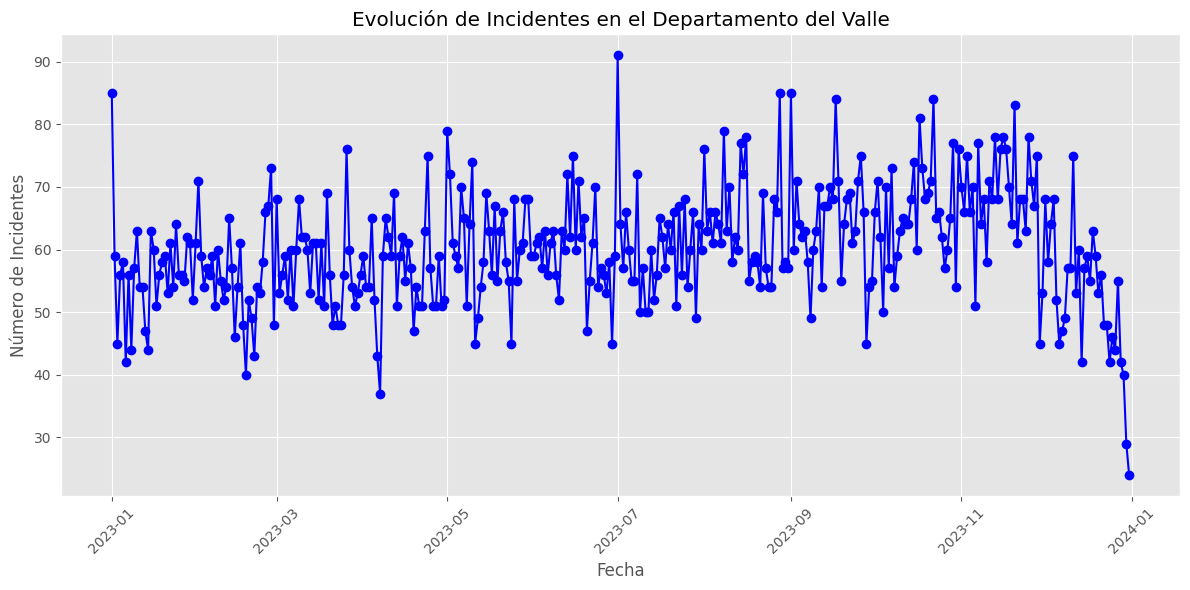

<Figure size 640x480 with 0 Axes>

In [ ]:
incidentes_por_dia = df_valle.groupby('FECHA HECHO').size()

fechas = incidentes_por_dia.index.to_numpy()
cantidades = incidentes_por_dia.values


plt.figure(figsize=(12, 6))
plt.plot(fechas, cantidades, marker='o', linestyle='-', color='b')
plt.title('Evolución de Incidentes en el Departamento del Valle')
plt.xlabel('Fecha')
plt.ylabel('Número de Incidentes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('grafico de lines evolucion incidentes en el valle.png')


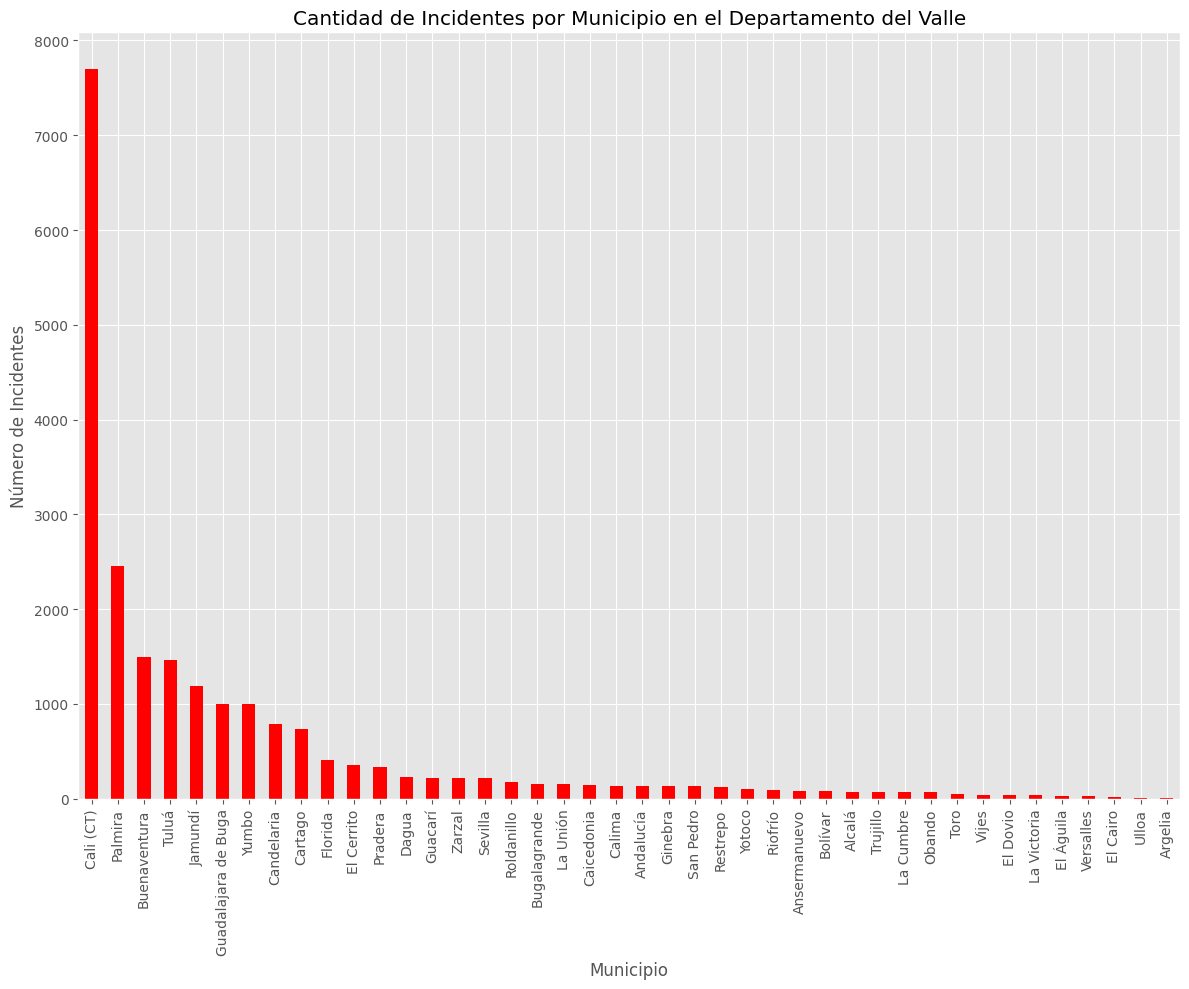

<Figure size 640x480 with 0 Axes>

In [ ]:

incidentes_por_municipio = df_valle['MUNICIPIO'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(12, 10))
incidentes_por_municipio.plot(kind='bar', color='r')
plt.title('Cantidad de Incidentes por Municipio en el Departamento del Valle')
plt.xlabel('Municipio')
plt.ylabel('Número de Incidentes')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig('Grafico de barras cantidad de incidentes por municipio.png')


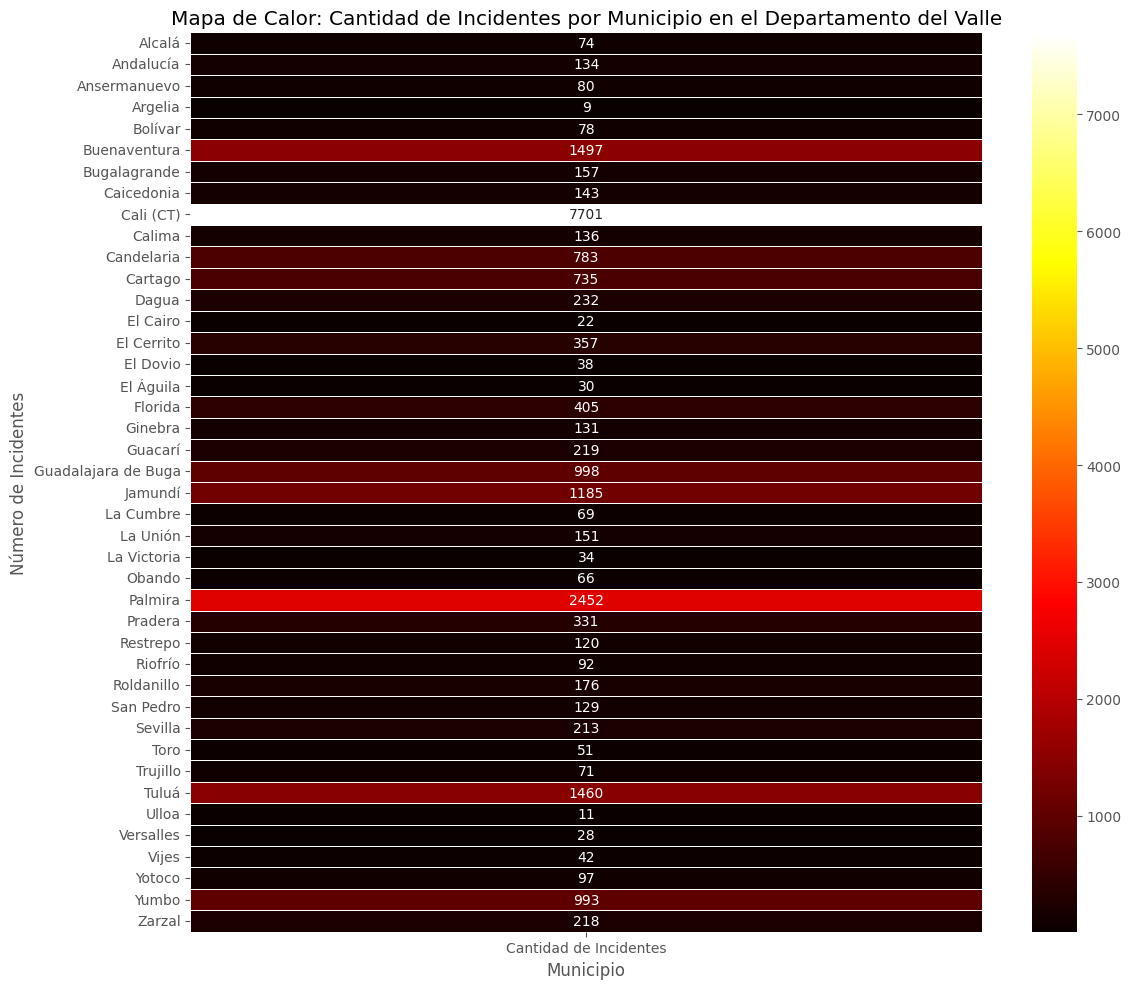

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns


incidentes_por_municipio = df_valle['MUNICIPIO'].value_counts().sort_values(ascending=False)


df_heatmap = pd.DataFrame({'Municipio': incidentes_por_municipio.index, 'Cantidad de Incidentes': incidentes_por_municipio.values})


df_heatmap = df_heatmap.reset_index(drop=True)


plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap.pivot_table(index='Municipio', values='Cantidad de Incidentes', aggfunc='sum'), cmap='hot', annot=True, fmt="d", linewidths=.5)
plt.title('Mapa de Calor: Cantidad de Incidentes por Municipio en el Departamento del Valle')
plt.xlabel('Municipio')
plt.ylabel('Número de Incidentes')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('mapaCalor cantidad de incidentes por municipio.png')


Histograma por género

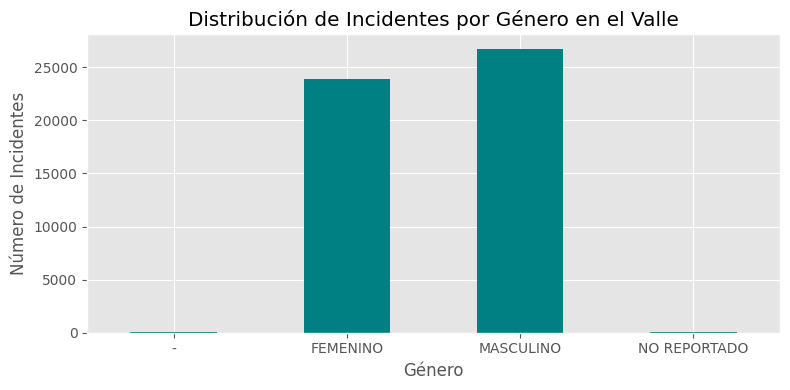

<Figure size 640x480 with 0 Axes>

In [ ]:

incidentes_por_genero = df_valle.groupby('GENERO')['CANTIDAD'].sum()
plt.figure(figsize=(8, 4))
incidentes_por_genero.plot(kind='bar', color='teal')
plt.title('Distribución de Incidentes por Género en el Valle')
plt.xlabel('Género')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('Histograma Distribucion de incidente por genero.png')


GRAFICA CIRCULAR

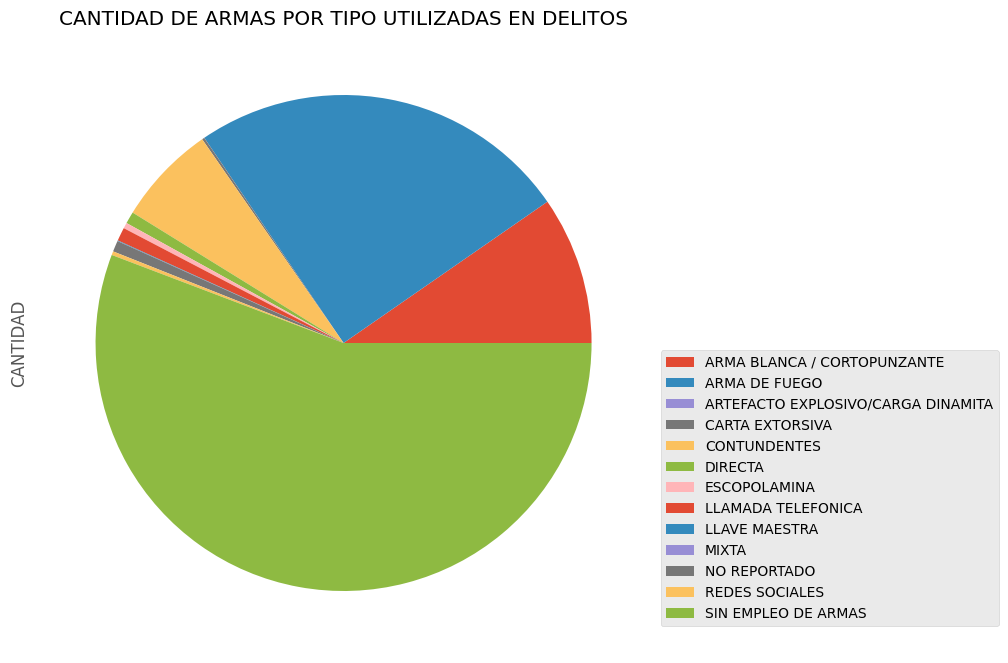

In [ ]:
arma_cantidad = df_valle.groupby('ARMA MEDIO')['CANTIDAD'].sum()


plt.figure(figsize=(8, 9))

arma_cantidad.plot(kind='pie', labeldistance=None)

plt.title('CANTIDAD DE ARMAS POR TIPO UTILIZADAS EN DELITOS')

tipo_de_arma= []
c= []
#destacar=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #LA OPCIONQUE SE DESTACA



plt.style.use('ggplot')
plt.pie(x=c, shadow=True, startangle=30, labels=(None), autopct= "%.2f%%")   #Shadow=sombra     explode=destacar     autopct= "%.2f%%"
plt.axis= ('equal')

plt.legend(loc="upper left", bbox_to_anchor=(1,0.5))



plt.savefig('GRAFICO CIRCULAR.png')


plt.show()


Mapa de calor dsitribución de accidentes por grupo de edad





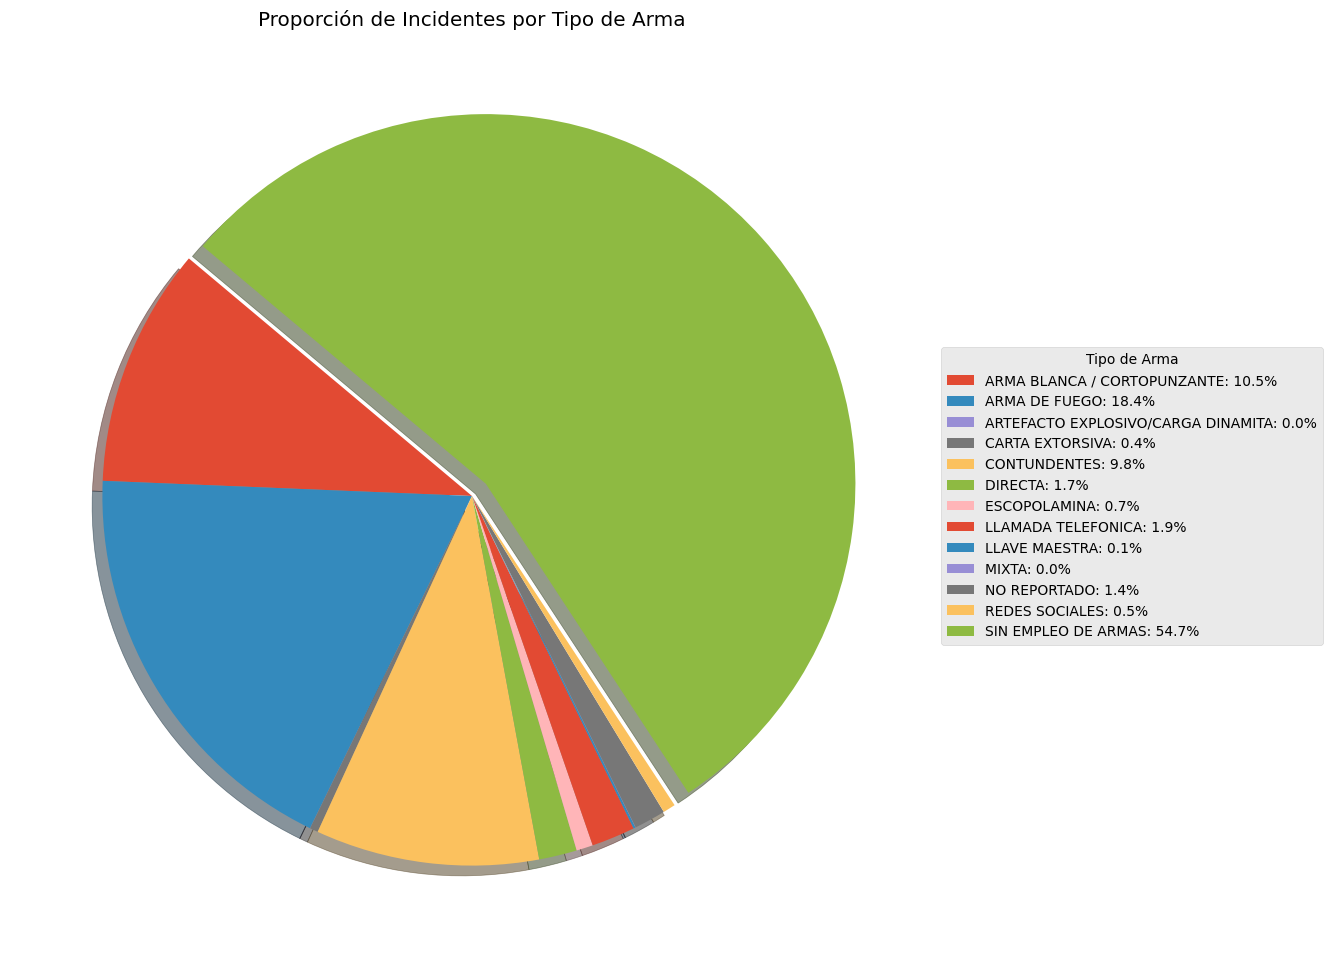

In [125]:

total_incidentes = incidentes_por_arma.sum()
porcentajes = (incidentes_por_arma / total_incidentes * 100).round(1)

etiquetas_leyenda = [f'{arma}: {porc}%' for arma, porc in zip(incidentes_por_arma.index, porcentajes)]
plt.figure(figsize=(14, 12))


explode = [0.05 if i == incidentes_por_arma.idxmax() else 0 for i in incidentes_por_arma.index]


plt.pie(incidentes_por_arma, startangle=140, shadow=True, explode=explode)

plt.legend(etiquetas_leyenda, title="Tipo de Arma", loc="center left", bbox_to_anchor=(1, 0.5))


plt.title('Cantidad de armas por tipo utilizadas en delitos')


plt.show()


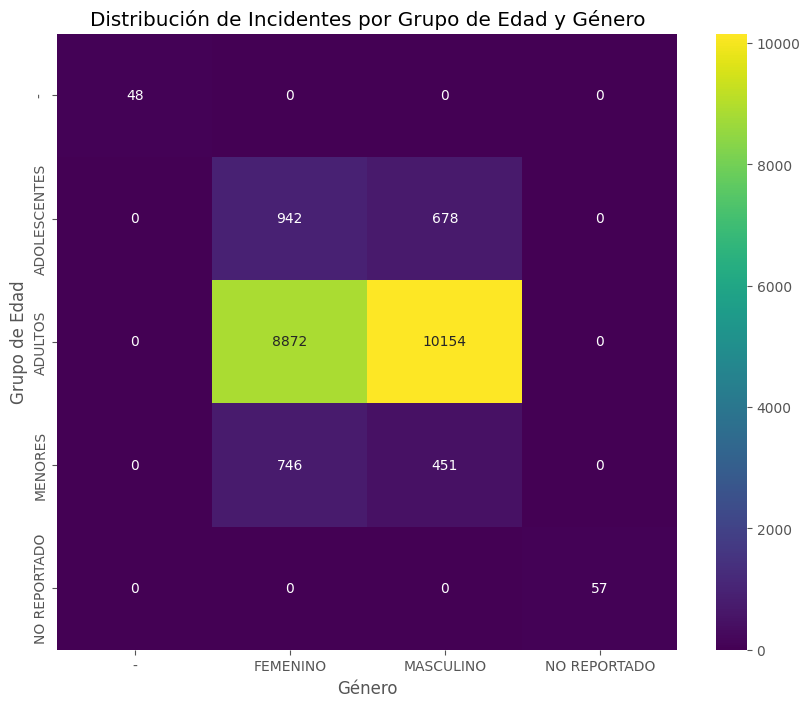

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns

incidentes_por_edad = df_valle.groupby('*AGRUPA_EDAD_PERSONA').size()
tabla_contingencia = pd.crosstab(df_valle['*AGRUPA_EDAD_PERSONA'], df_valle['GENERO'])

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap='viridis')
plt.title('Distribución de Incidentes por Grupo de Edad y Género')
plt.xlabel('Género')
plt.ylabel('Grupo de Edad')
plt.show()

plt.savefig('mapaCalorGrupoEdadYGenero.png')
